<a href="https://colab.research.google.com/github/alfitranurr/DATA-MINING/blob/main/Tugas_1_(Data_Teks)_Modul_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Persiapan Data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tabulate import tabulate
import emoji
import warnings
warnings.filterwarnings('ignore')

In [46]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
data = pd.read_csv('Tugas 1_NIM Genap_Modul 4.csv')

In [48]:
data.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


# 2. Data Cleaning

In [50]:
def clean_text(text):
    text = str(text).lower()

    text = emoji.replace_emoji(text, replace='')

    text = text.replace('-', ' ')

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    text = ' '.join(tokens)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [51]:
data['cleaned_text'] = data['text'].apply(clean_text)

In [53]:
data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...
1,A four-minute-long video of a woman criticisin...,four minute long video woman criticising gover...
2,"Republic Poll, a fake Twitter account imitatin...",republic poll fake twitter account imitating a...
3,"Delhi teen finds place on UN green list, turns...",delhi teen finds place un green list turns gla...
4,Delhi: A high-level meeting underway at reside...,delhi high level meeting underway residence ra...


# 3. Train Test Split

In [54]:
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

In [55]:
X = data['cleaned_text']
y = data['label_encoded']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
print(f"Ukuran X_train: {X_train.shape}")

Ukuran X_train: (2983,)


In [58]:
print(f"Ukuran X_test: {X_test.shape}")

Ukuran X_test: (746,)


In [59]:
print(f"Distribusi label di y_train: {np.bincount(y_train)}")

Distribusi label di y_train: [1501 1482]


In [60]:
print(f"Distribusi label di y_test: {np.bincount(y_test)}")

Distribusi label di y_test: [376 370]


# 4. Vektorisasi Teks

In [63]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [64]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [65]:
X_test_tfidf = tfidf.transform(X_test)

In [66]:
print(f"Bentuk X_train_tfidf: {X_train_tfidf.shape}")

Bentuk X_train_tfidf: (2983, 5000)


In [67]:
print(f"Bentuk X_test_tfidf: {X_test_tfidf.shape}")

Bentuk X_test_tfidf: (746, 5000)


# 5. Model Naive Bayes

In [68]:
nb_model = MultinomialNB()

In [69]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [70]:
y_pred_nb = nb_model.predict(X_test_tfidf)

In [71]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [72]:
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")

Akurasi Naive Bayes: 0.9504


In [81]:
print("\nClassification Report Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))


Classification Report Naive Bayes:
              precision    recall  f1-score   support

        FAKE       0.91      1.00      0.95       376
        REAL       1.00      0.90      0.95       370

    accuracy                           0.95       746
   macro avg       0.96      0.95      0.95       746
weighted avg       0.95      0.95      0.95       746



In [84]:
print("\nConfusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))


Confusion Matrix Naive Bayes:
[[376   0]
 [ 37 333]]


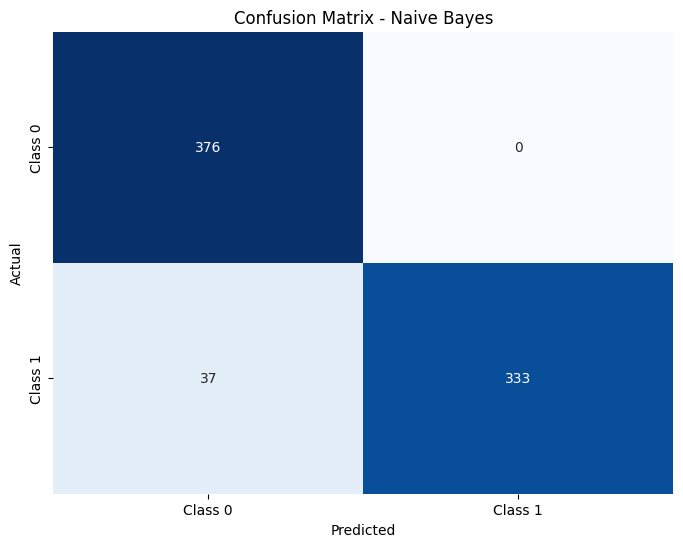

In [85]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Model ANN

In [87]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [88]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [89]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
history = ann_model.fit(X_train_dense, y_train, epochs=10, batch_size=32,
                       validation_data=(X_test_dense, y_test), verbose=1)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8515 - loss: 0.4230 - val_accuracy: 0.9946 - val_loss: 0.0152
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9983 - loss: 0.0103 - val_accuracy: 0.9960 - val_loss: 0.0111
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9946 - val_loss: 0.0087
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9960 - val_loss: 0.0074
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9980 - loss: 0.0040 - val_accuracy: 0.9960 - val_loss: 0.0067
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 0.9987 - val_loss: 0.0058
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9974 - loss: 0.0040 - val_accuracy: 0.9987 - val_loss:

In [91]:
loss, accuracy_ann = ann_model.evaluate(X_test_dense, y_test)
print(f"Akurasi ANN: {accuracy_ann:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - loss: 0.0047   
Akurasi ANN: 0.9987


In [92]:
y_pred_ann = (ann_model.predict(X_test_dense) > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [93]:
print("\nClassification Report ANN:")
print(classification_report(y_test, y_pred_ann, target_names=label_encoder.classes_))


Classification Report ANN:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       376
        REAL       1.00      1.00      1.00       370

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



In [94]:
print("\nConfusion Matrix ANN:")
print(confusion_matrix(y_test, y_pred_ann))


Confusion Matrix ANN:
[[375   1]
 [  0 370]]


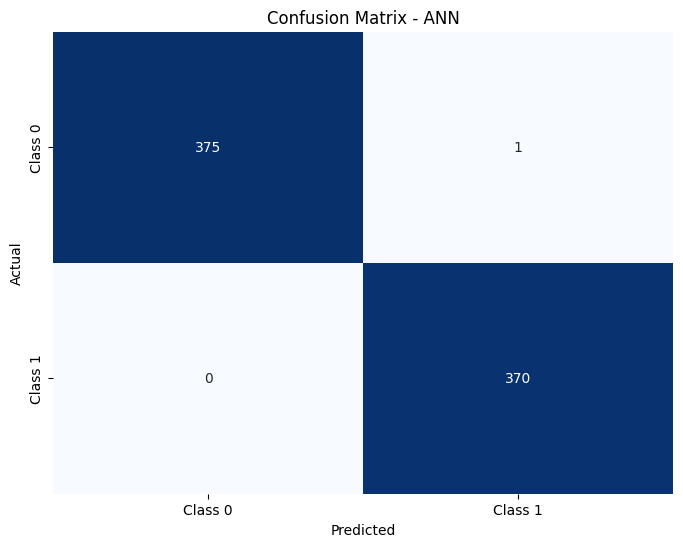

In [95]:
cm = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Perbandingan Akurasi

In [ ]:
print("\nPerbandingan Akurasi:")
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")
print(f"Akurasi ANN: {accuracy_ann:.4f}")
print(f"Perbedaan Akurasi (ANN - Naive Bayes): {(accuracy_ann - accuracy_nb):.4f}")


Perbandingan Akurasi:
Akurasi Naive Bayes: 0.9504
Akurasi ANN: 0.9987
Perbedaan Akurasi (ANN - Naive Bayes): 0.0483


In [97]:
best_model = "Naive Bayes" if accuracy_nb > accuracy_ann else "ANN"
print(f"Model terbaik berdasarkan akurasi: {best_model}")

Model terbaik berdasarkan akurasi: ANN


In [98]:
table_data = [
    ["Naive Bayes", f"{accuracy_nb:.4f}", f"{(accuracy_ann - accuracy_nb):.4f}", best_model if accuracy_nb > accuracy_ann else ""],
    ["ANN", f"{accuracy_ann:.4f}", "", best_model if accuracy_ann >= accuracy_nb else ""]
]

headers = ["Model", "Akurasi", "Perbedaan Akurasi (ANN - Naive Bayes)", "Model Terbaik"]

In [99]:
print("\nTabel Perbandingan Akurasi:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Tabel Perbandingan Akurasi:
+-------------+-----------+-----------------------------------------+-----------------+
| Model       |   Akurasi | Perbedaan Akurasi (ANN - Naive Bayes)   | Model Terbaik   |
+=============+===========+=========================================+=================+
| Naive Bayes |    0.9504 | 0.0483                                  |                 |
+-------------+-----------+-----------------------------------------+-----------------+
| ANN         |    0.9987 |                                         | ANN             |
+-------------+-----------+-----------------------------------------+-----------------+


# 8. Cek Fitting

## Cek Fitting Naive Bayes

In [103]:
train_pred_nb = nb_model.predict(X_train_tfidf)
train_accuracy_nb = accuracy_score(y_train, train_pred_nb)
print(f"\nNaive Bayes - Akurasi Pelatihan: {train_accuracy_nb:.4f}")
print(f"Naive Bayes - Akurasi Pengujian: {accuracy_nb:.4f}")


Naive Bayes - Akurasi Pelatihan: 0.9490
Naive Bayes - Akurasi Pengujian: 0.9504


In [104]:
if train_accuracy_nb > accuracy_nb + 0.1:  
    nb_status = "Overfitting"
elif train_accuracy_nb < 0.7 and accuracy_nb < 0.7: 
    nb_status = "Underfitting"
else:
    nb_status = "Normal"

print(f"Status Naive Bayes: {nb_status}")

Status Naive Bayes: Normal


## Cek Fitting ANN

In [105]:
train_loss, train_accuracy_ann = ann_model.evaluate(X_train_dense, y_train, verbose=0)
print(f"\nANN - Akurasi Pelatihan: {train_accuracy_ann:.4f}")
print(f"ANN - Akurasi Pengujian: {accuracy_ann:.4f}")


ANN - Akurasi Pelatihan: 0.9993
ANN - Akurasi Pengujian: 0.9987


In [ ]:
val_loss = history.history['val_loss']
train_loss_history = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

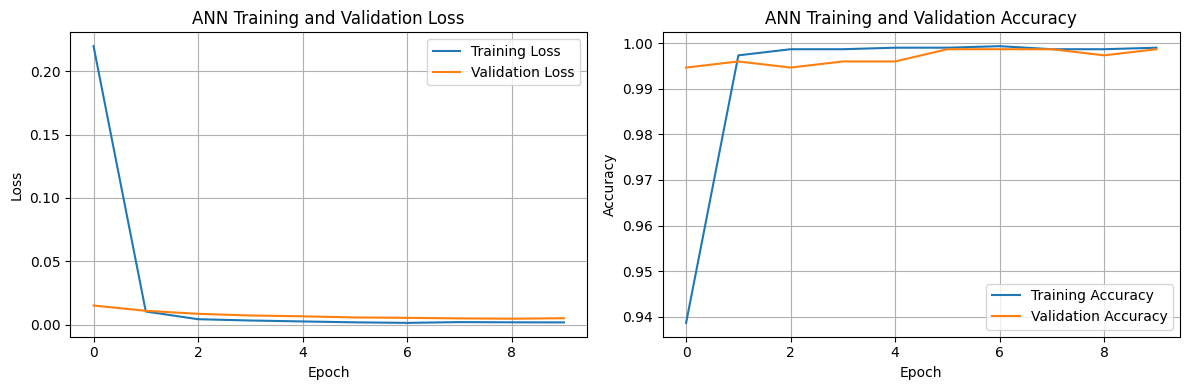

In [107]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('ann_training_history.png')
plt.show()
plt.close()

In [108]:
if train_accuracy_ann > accuracy_ann + 0.1 and val_loss[-1] > val_loss[0]: 
    ann_status = "Overfitting"
elif train_accuracy_ann < 0.7 and accuracy_ann < 0.7: 
    ann_status = "Underfitting"
else:
    ann_status = "Normal"

print(f"Status ANN: {ann_status}")

Status ANN: Normal


## Table Fitting Naive Bayes & ANN

In [112]:
fitting_table = [
    ["Naive Bayes", f"{train_accuracy_nb:.4f}", f"{accuracy_nb:.4f}", nb_status],
    ["ANN", f"{train_accuracy_ann:.4f}", f"{accuracy_ann:.4f}", ann_status]
]

fitting_headers = ["Model", "Akurasi Pelatihan", "Akurasi Pengujian", "Status"]

In [113]:
print("\nTabel Status Fitting:")
print(tabulate(fitting_table, headers=fitting_headers, tablefmt="grid"))


Tabel Status Fitting:
+-------------+---------------------+---------------------+----------+
| Model       |   Akurasi Pelatihan |   Akurasi Pengujian | Status   |
+=============+=====================+=====================+==========+
| Naive Bayes |              0.949  |              0.9504 | Normal   |
+-------------+---------------------+---------------------+----------+
| ANN         |              0.9993 |              0.9987 | Normal   |
+-------------+---------------------+---------------------+----------+


# 9. Contoh Prediksi

In [114]:
sample_text = "A viral video claims that the government is hiding the truth about a new disease outbreak in the capital."

In [115]:
cleaned_sample = clean_text(sample_text)

In [116]:
sample_tfidf = tfidf.transform([cleaned_sample])
sample_tfidf_dense = sample_tfidf.toarray()

In [117]:
prediction_nb = nb_model.predict(sample_tfidf)
predicted_label_nb = label_encoder.inverse_transform(prediction_nb)[0]

In [118]:
prediction_ann = (ann_model.predict(sample_tfidf_dense) > 0.5).astype(int)
predicted_label_ann = label_encoder.inverse_transform(prediction_ann.flatten())[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [119]:
print("\nContoh Prediksi:")
print(f"Teks: {sample_text}")
print(f"Prediksi Naive Bayes: {predicted_label_nb}")
print(f"Prediksi ANN: {predicted_label_ann}")


Contoh Prediksi:
Teks: A viral video claims that the government is hiding the truth about a new disease outbreak in the capital.
Prediksi Naive Bayes: FAKE
Prediksi ANN: FAKE
